<a href="https://colab.research.google.com/github/veronica1908/RH_Entrega1/blob/main/2_carga_lib_paq_limpieza_a_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Carga de paquetes y librerías**

In [36]:
### Carga de paquetes y librerías
#Preparamos complementos, librerías y bases disponibles
import warnings
warnings.filterwarnings("ignore")
!pip install pandas numpy sweetviz seaborn matplotlib scikit-learn
!pip install tensorflow
!pip install keras
!pip install scikit-learn
!pip install sweetviz

In [37]:
# importamos librerias
import sqlite3
import pandas as pd
import numpy as np
import requests
import tempfile
import sweetviz as sv
import plotly.express as px
import matplotlib as mpl ## gráficos
import matplotlib.pyplot as plt ### gráficos
import seaborn as sns

from pandas.plotting import scatter_matrix  ## para matriz de correlaciones
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from io import BytesIO
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

## **Carga o conexión de datos**

In [38]:
# Cargar el contenido del archivo CSV-SQL que ha sido preprocesado, en un DataFrame de Pandas
dfdata = pd.read_csv("https://github.com/veronica1908/RH_Entrega1/raw/c510a11999febb3074b9eb5f7b1dc19a36435978/dftotal_Preprocesado.csv")

# Visualizar las primeras filas del DataFrame
dfdata.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,JobSatisfaction,WorkLifeBalance,DateSurvey,JobInvolvement,PerformanceRating,SurveyDate,Attrition,retirementDate,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,4.0,2.0,2015-12-31,3,3,2015-12-31,NaN,NaN,NaN,NaN
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,2.0,4.0,2015-12-31,2,4,2015-12-31,Yes,2016-10-15,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,2.0,1.0,2015-12-31,3,3,2015-12-31,NaN,NaN,NaN,NaN
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,4.0,3.0,2015-12-31,2,3,2015-12-31,NaN,NaN,NaN,NaN
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,1.0,3.0,2015-12-31,3,3,2015-12-31,NaN,NaN,NaN,NaN


##**Limpieza y transformación de los datos**


In [39]:
# Revisión inicial de datos para obsevar las dimensiones del dataframe
dfdata.shape

(8820, 35)

In [40]:
# Lista de las etiquetas de las columnas presentes en el dataFrame.
dfdata.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'InfoDate',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'DateSurvey', 'JobInvolvement', 'PerformanceRating', 'SurveyDate',
       'Attrition', 'retirementDate', 'retirementType', 'resignationReason'],
      dtype='object')

In [41]:
# Información sobre las columnas y su tipo de datos
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8820 non-null   int64  
 1   BusinessTravel           8820 non-null   object 
 2   Department               8820 non-null   object 
 3   DistanceFromHome         8820 non-null   int64  
 4   Education                8820 non-null   int64  
 5   EducationField           8820 non-null   object 
 6   EmployeeCount            8820 non-null   int64  
 7   EmployeeID               8820 non-null   int64  
 8   Gender                   8820 non-null   object 
 9   JobLevel                 8820 non-null   int64  
 10  JobRole                  8820 non-null   object 
 11  MaritalStatus            8820 non-null   object 
 12  MonthlyIncome            8820 non-null   int64  
 13  NumCompaniesWorked       8782 non-null   float64
 14  Over18                  

In [42]:
# Identificar rápidamente las columnas que tienen datos faltantes en el conjunto de datos.
dfdata.isnull().sum()

Age                           0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked           38
Over18                        0
PercentSalaryHike             0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears            18
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
InfoDate                      0
EnvironmentSatisfaction      50
JobSatisfaction              40
WorkLifeBalance              76
DateSurvey                    0
JobInvolvement                0
PerformanceRating             0
SurveyDate                    0
Attritio

In [43]:
# Eliminar los datos nulos de la columnas identificadas con datos nulos en bajo porcentaje.
dfdata = dfdata.dropna(subset=['NumCompaniesWorked','TotalWorkingYears','EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'])

In [44]:
# Reemplazar los valores nulos en las columnas Attrition,  retirementDate , retirementType, por la cadena "NA" (no aplica), ya que son columnas que solo aplican cuando hay retiros.
columnas_a_reemplazar = ['Attrition', 'retirementDate', 'retirementType']

# Reemplazar los valores nulos en las columnas especificadas por la cadena "NA"
dfdata[columnas_a_reemplazar] = dfdata[columnas_a_reemplazar].fillna('NA')

In [45]:
#Para la variable resignationReason, se verifica las categorías que contiene
# Obtener las categorías únicas de la columna 'resignationReason'
categorias = dfdata['resignationReason'].unique()

# Mostrar las categorías
print("Categorías de la columna 'resignationReason':")
for categoria in categorias:
    print(categoria)

Categorías de la columna 'resignationReason':
nan
Others
Stress
Salary


In [46]:
#Como existe la categoría 'Others', se asignará los datos nulos a esa categoría
# Reemplazar los valores nulos en la columna 'resignationReason' con 'Others'
dfdata['resignationReason'] = dfdata['resignationReason'].fillna('Others')

In [47]:
# Verificar las columnas nuevamente en cuanto a datos nulos, confirmando que no quedan pendientes.
dfdata.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
InfoDate                   0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
DateSurvey                 0
JobInvolvement             0
PerformanceRating          0
SurveyDate                 0
Attrition                  0
retirementDate             0
retirementType             0
resignationRea

In [48]:
#Verificamos nuevamente la dimensión de la base de datos
dfdata.shape

(8600, 35)

In [49]:
# imprimir los valores únicos de cada columna.
for columna in dfdata.columns[:]:
  print('\n {}'.format(columna))
  print(dfdata[columna].unique())


 Age
[51 31 32 38 46 28 29 25 45 55 47 37 21 35 26 50 53 44 49 36 42 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]

 BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

 Department
['Sales' 'Research & Development' 'Human Resources']

 DistanceFromHome
[ 6 10 17  2  8 11 18  1  7 14  3 16  9  5  4 20 29 15 13 24 19 28 22 25
 21 26 27 12 23]

 Education
[2 1 4 5 3]

 EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

 EmployeeCount
[1]

 EmployeeID
[   1    2    3 ... 4407 4408 4409]

 Gender
['Female' 'Male']

 JobLevel
[1 4 3 2 5]

 JobRole
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

 MaritalStatus
['Married' 'Single' 'Divorced']

 MonthlyIncome
[131160  41890 193280 ...  32020  36810 173990]

 NumCompaniesWorked
[1. 0. 3. 4. 2. 7. 9. 5. 6. 8.]

 Over1

Como ya se han tratado los datos nulos, procedemos a realizar el análisis exploratorio para comprender mejor las variables.

In [50]:
#ahora estudiaremos mejor el comportamiento de las variables para observar la aproximación de nuestro analisiS exploratorio
dfdata[['StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']]= dfdata[['StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].astype(str)

In [51]:
dfdata[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']] = dfdata[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].astype(float)

In [52]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8600 entries, 0 to 8818
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8600 non-null   float64
 1   BusinessTravel           8600 non-null   object 
 2   Department               8600 non-null   object 
 3   DistanceFromHome         8600 non-null   float64
 4   Education                8600 non-null   int64  
 5   EducationField           8600 non-null   object 
 6   EmployeeCount            8600 non-null   int64  
 7   EmployeeID               8600 non-null   int64  
 8   Gender                   8600 non-null   object 
 9   JobLevel                 8600 non-null   int64  
 10  JobRole                  8600 non-null   object 
 11  MaritalStatus            8600 non-null   object 
 12  MonthlyIncome            8600 non-null   float64
 13  NumCompaniesWorked       8600 non-null   float64
 14  Over18                  

## **Análisis exploratorio de los datos**

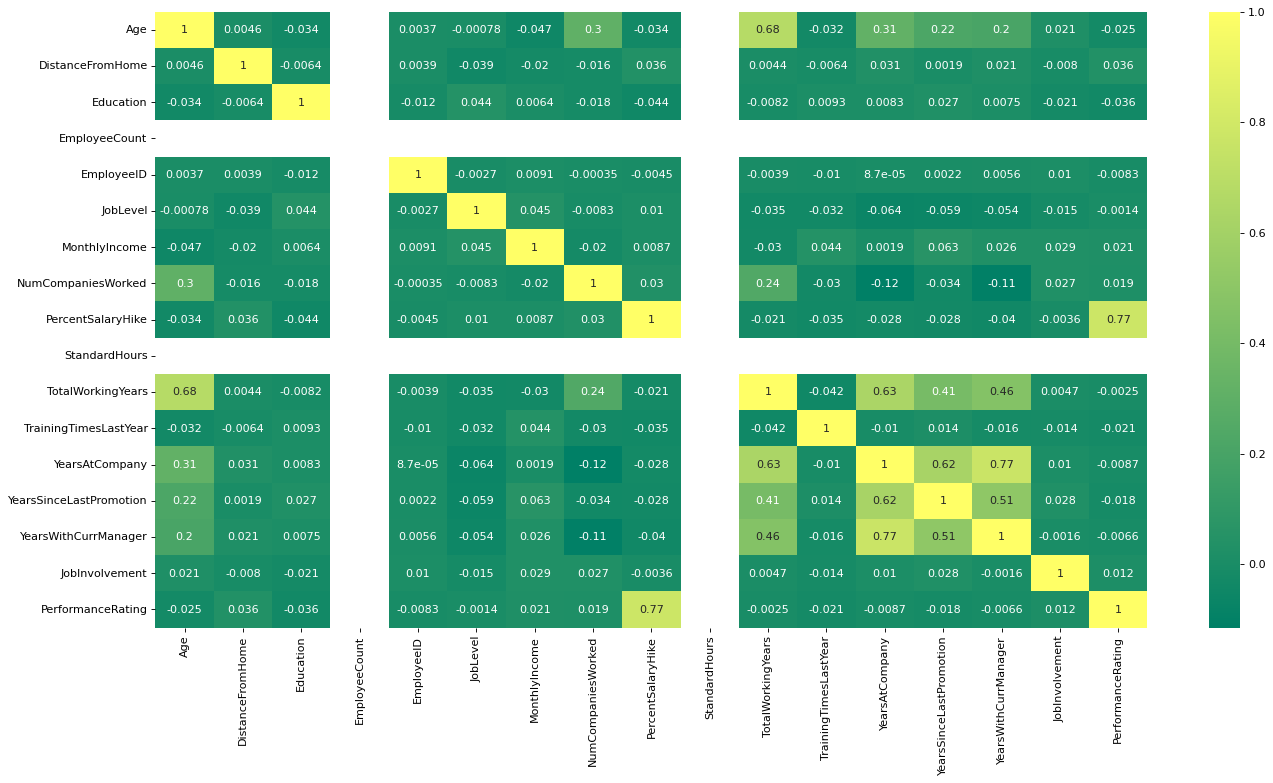

In [53]:
# Se hace uso de un gráfico de correlación para definir las variables numéricas por explorar con respecto a la variable objetivo
plt.figure (figsize=(20, 10), dpi=80);
sns.heatmap(dfdata.corr(), annot = True,cmap='summer');

Tomando correlaciones iguales o superiores a 0,5, se tiene:
- Correlación de 0.68 para edad y  total de años trabajados.
- Correlación de 0.77 entre porcentaje de incremento del salario y clasificación de rendimiento.
- Correlación de 0.63 entre años trabajados y años en la compañía.
- Correlación de 0.62 entre años en la compañía y años desde la última promoción.
- Correlación de 0.77 entre años en la compañía y años con el gerente actual.
- Correlación de 0.51 entre años desde la última promoción y  años con el gerente actual.

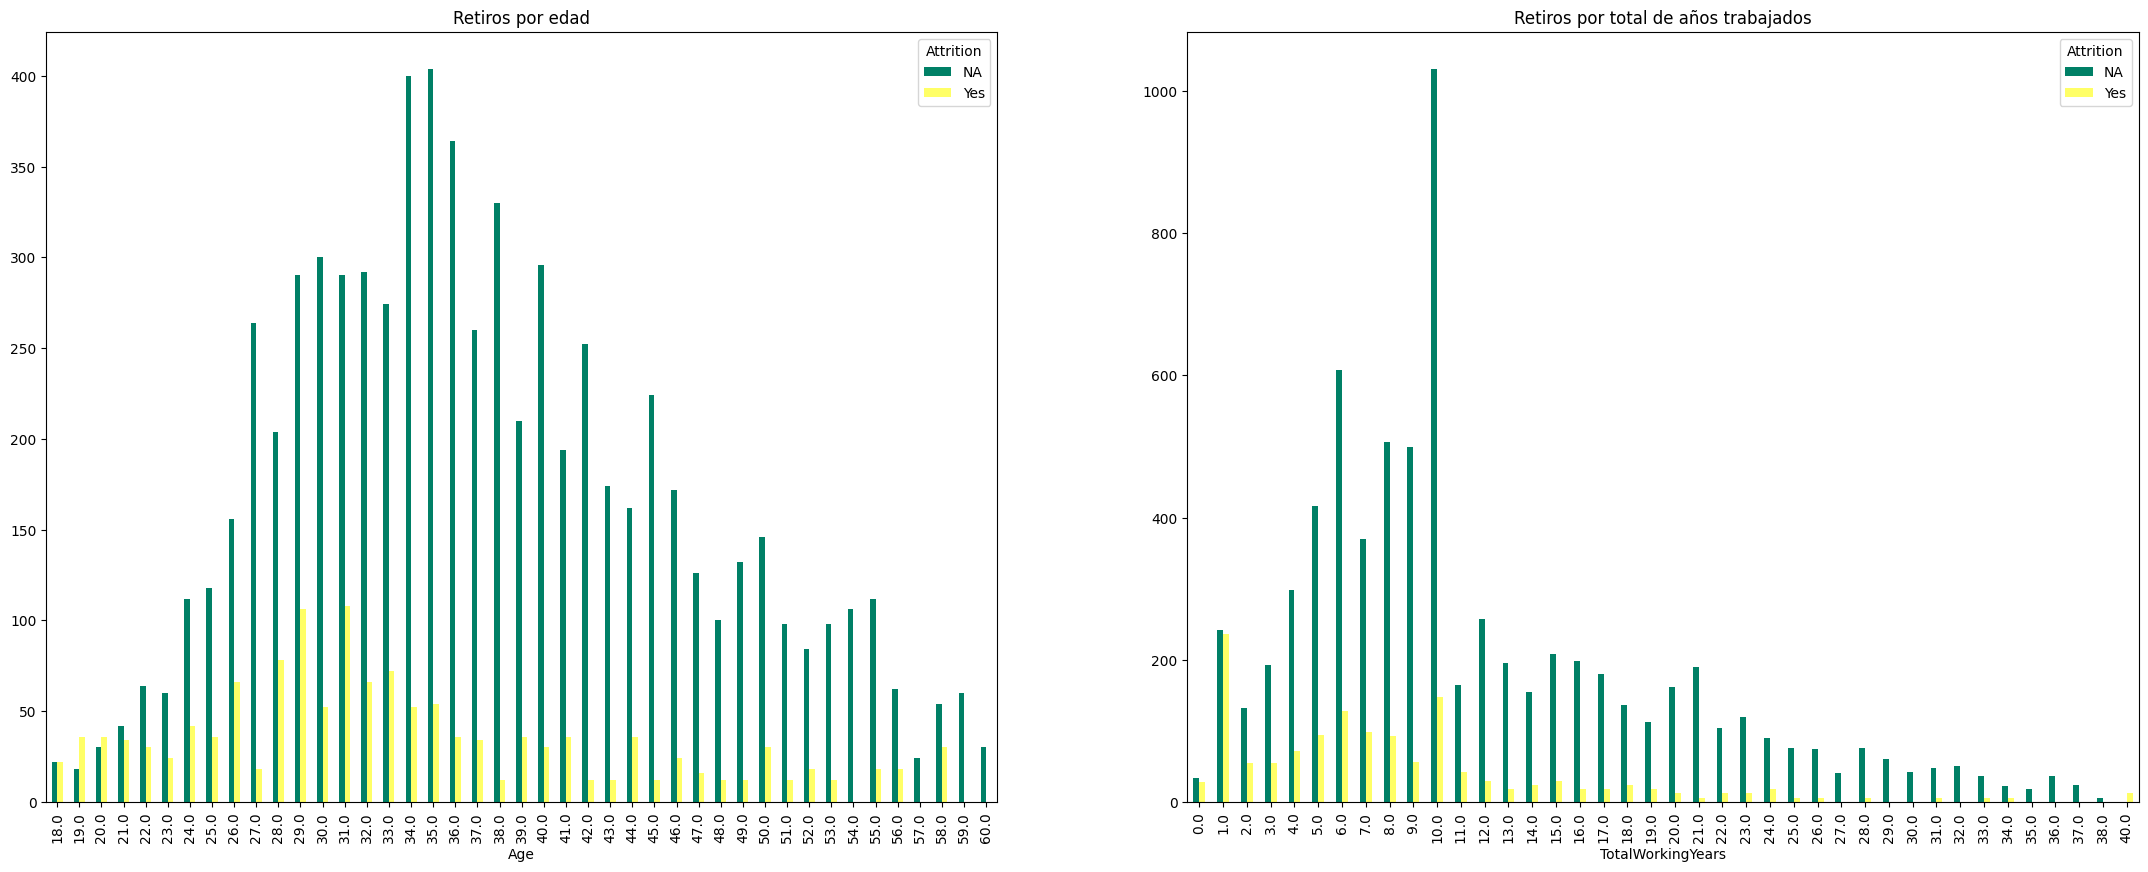

In [54]:
#Comparemos las variables de mayor correlación con la variable retiros que es el objetivo
# Cuál es la edad de las personas que se retiran y  Relación con la variable de años en la compañía

# Crear una figura
fig, axs = plt.subplots(1, 2, figsize=(27, 10))

# Gráfico Edad
pd.crosstab(index=dfdata['Age'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[0], colormap='summer')
axs[0].set_title('Retiros por edad')

# Gráfico años totales trabajados
pd.crosstab(index=dfdata['TotalWorkingYears'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[1], colormap='summer')
axs[1].set_title('Retiros por total de años trabajados')

# Mostrar los gráficos
plt.show()

Los colaboradores que se retiran, en mayor proporción, tienen 29 y 31 años, mientras que los que permanecen, tienen entre 34 y 36 años.
Hay mayor cantidad de retiros para los colaboradores que llevan en total un año de labores.

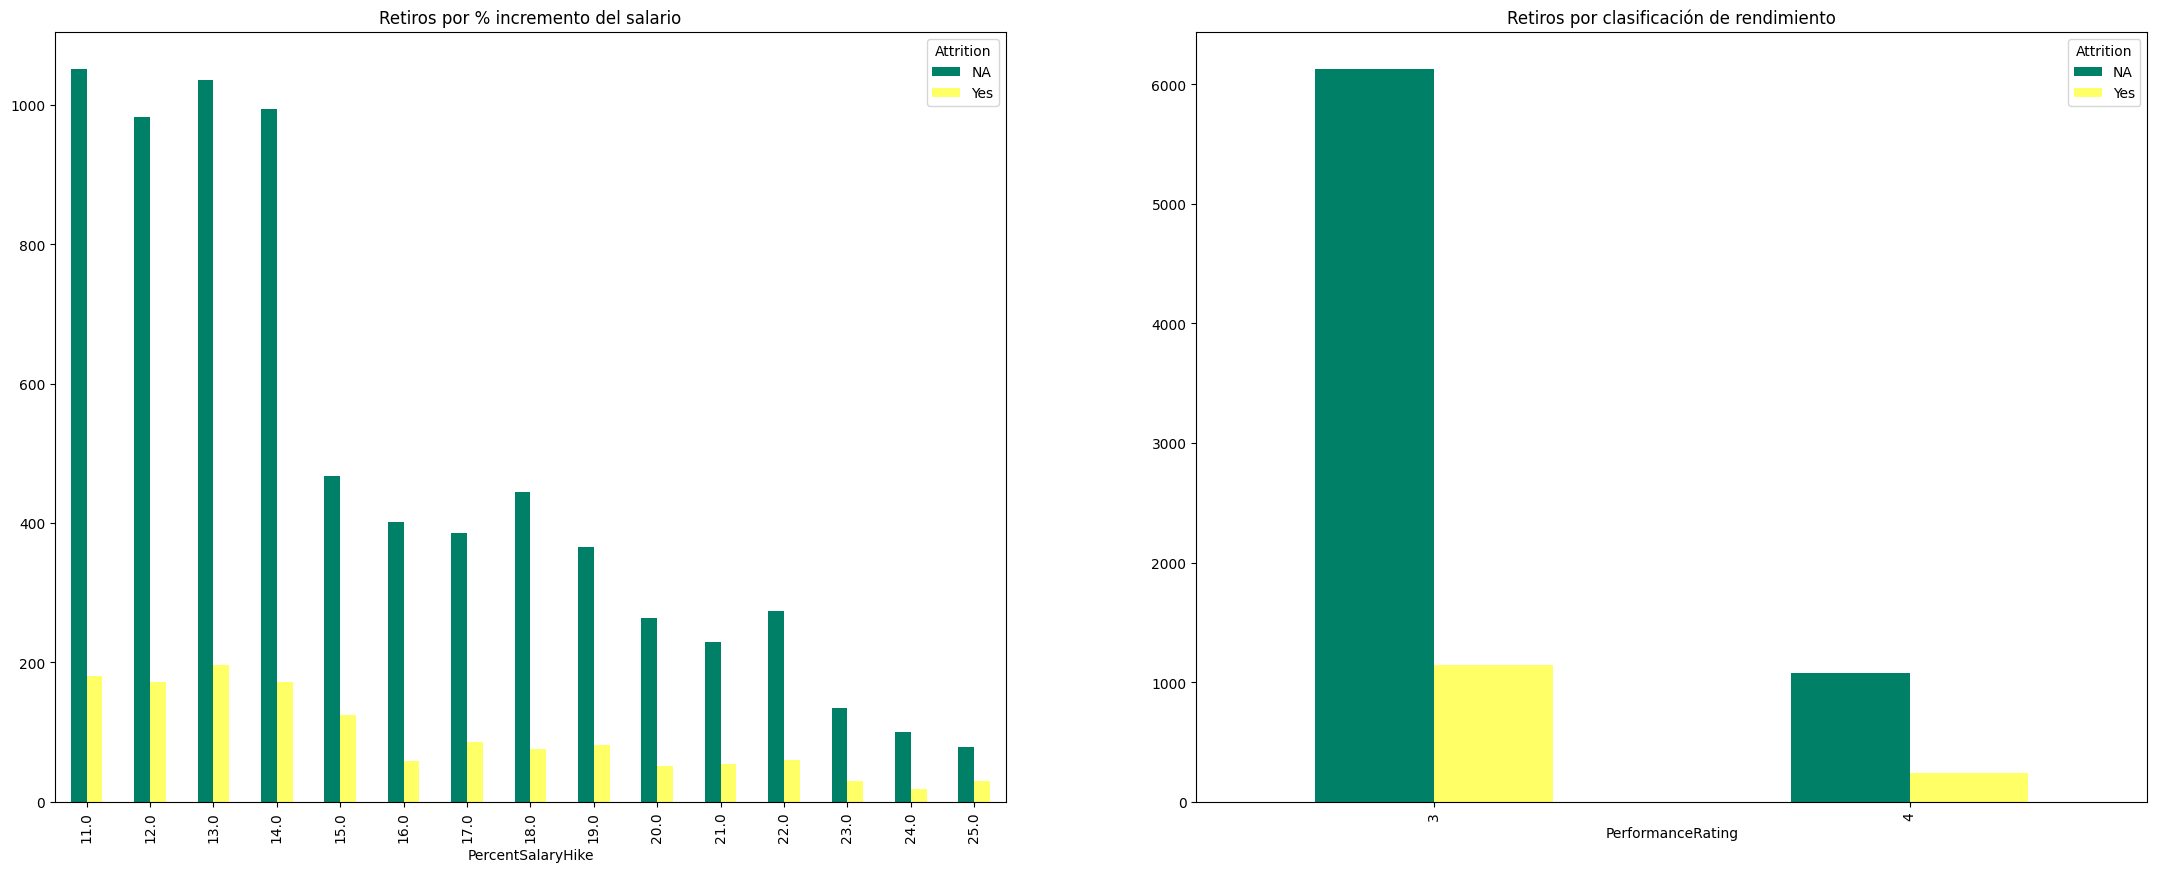

In [55]:
# Relación con las variables de porcentaje de incremento del salario y variable de clasificación de rendimiento

# Crear una figura
fig, axs = plt.subplots(1, 2, figsize=(27, 10))

# Gráfico % incremento salario
pd.crosstab(index=dfdata['PercentSalaryHike'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[0], colormap='summer')
axs[0].set_title('Retiros por % incremento del salario')

# Gráfico clas. rendimiento
pd.crosstab(index=dfdata['PerformanceRating'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[1], colormap='summer')
axs[1].set_title('Retiros por clasificación de rendimiento')

# Mostrar los gráficos
plt.show()

Se tiene que hay mayores retiros para porcentajes de incremento de salario mas bajos.
Se observa mayor cantidad de retiros para la clasificación de rendimiento igual a tres y menor para la clasificación cuatro.

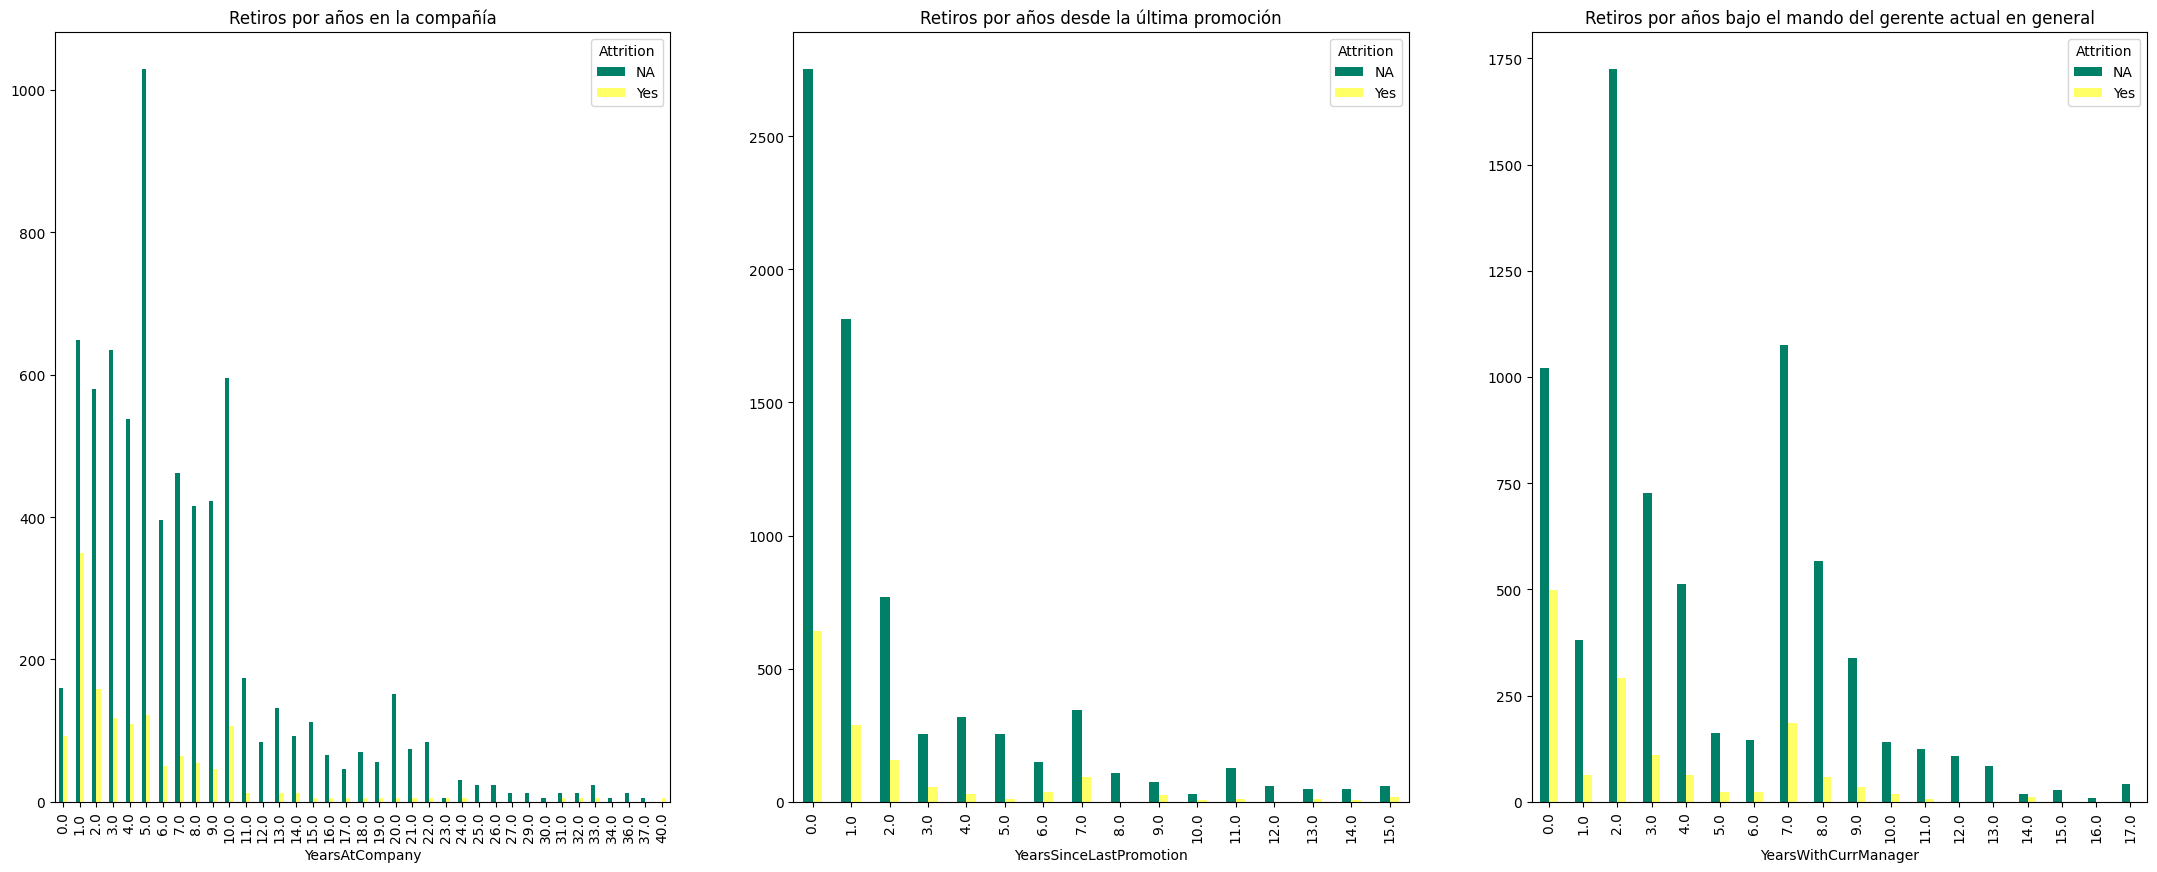

In [56]:
# Relación con las variables de años en la compañía y la variable de años desde la última promoción

# Crear una figura
fig, axs = plt.subplots(1, 3, figsize=(27, 10))

# Gráfico años en la compañía
pd.crosstab(index=dfdata['YearsAtCompany'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[0], colormap='summer')
axs[0].set_title('Retiros por años en la compañía')

# Gráfico años desde la última promoción
pd.crosstab(index=dfdata['YearsSinceLastPromotion'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[1], colormap='summer')
axs[1].set_title('Retiros por años desde la última promoción')

# Gráfico Años bajo el mando del gerente actual en general
pd.crosstab(index=dfdata['YearsWithCurrManager'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[2], colormap='summer')
axs[2].set_title('Retiros por años bajo el mando del gerente actual en general')

# Mostrar los gráficos
plt.show()

Las personas que llevaban un año en la compañía son las que mayor cantidad de retiros han tenido.
Existe mayor cantidad de retiros en colaboradores que han sido recientemente promovidos (menos de un año), lo que podría implicar una variable relacionada al motivo de retiro.
Los colaboradores que recientemente han cambiado de gerente (en el último año), son los que mayor cantidad de retiros presentan, seguido de los que llevan 2 años. Las cantidades de colaboradores que permanecen en la compañía, no son proporcionales a los retiros, por lo que esta variable también puede estar influyendo en el principal motivo de retiro y aportar a la solución.

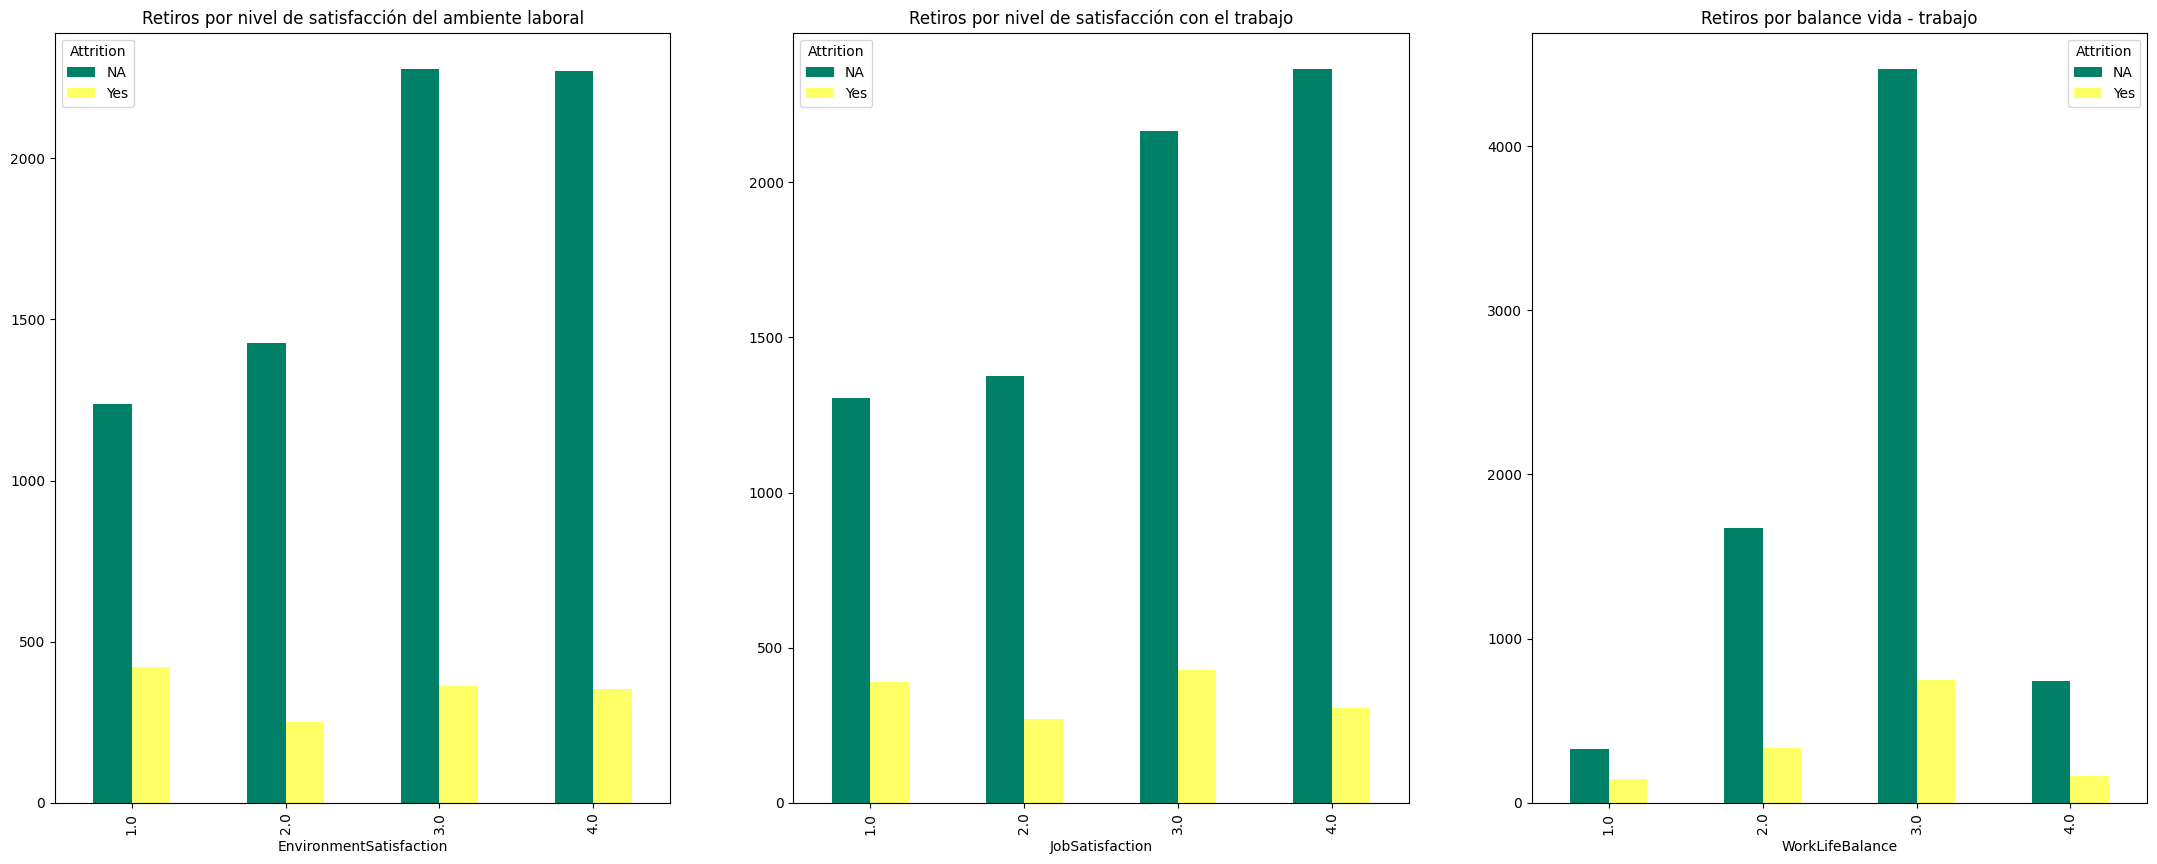

In [57]:
#Ahora exploremos las variables asociadas a la satisfacción de los colaboradores
#Crear figura
fig, axs = plt.subplots(1, 3, figsize=(27, 10))

# Gráfico satisfacción ambiente laboral
pd.crosstab(index=dfdata['EnvironmentSatisfaction'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[0], colormap='summer')
axs[0].set_title('Retiros por nivel de satisfacción del ambiente laboral')

# Gráfico satisfacción trabajo
pd.crosstab(index=dfdata['JobSatisfaction'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[1], colormap='summer')
axs[1].set_title('Retiros por nivel de satisfacción con el trabajo')

# Gráfico balance vida-trabajo
pd.crosstab(index=dfdata['WorkLifeBalance'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[2], colormap='summer')
axs[2].set_title('Retiros por balance vida - trabajo')

# Mostrar los gráficos
plt.show()

Estas variables son variables categoricas donde cada categoría está representada por números de la siguiente manera: 1 Bajo 2 Medio 3 Alto 4 Muy alto

Los colaboradores que se han retirado han calificado como bajo (1) su nivel de satisfaccion con el ambiente laboral, sin embargo, también hay unas cantidades considerables de retiros de colaboradores que calificaron su satisfacción en los niveles 3 y 4.

En el nivel de conciliación de la vida familiar y laboral podemos observar que la categoria donde mas encontramos valores es en la numero 3 Por lo que quizas ese no sea un motivo de renuncia.

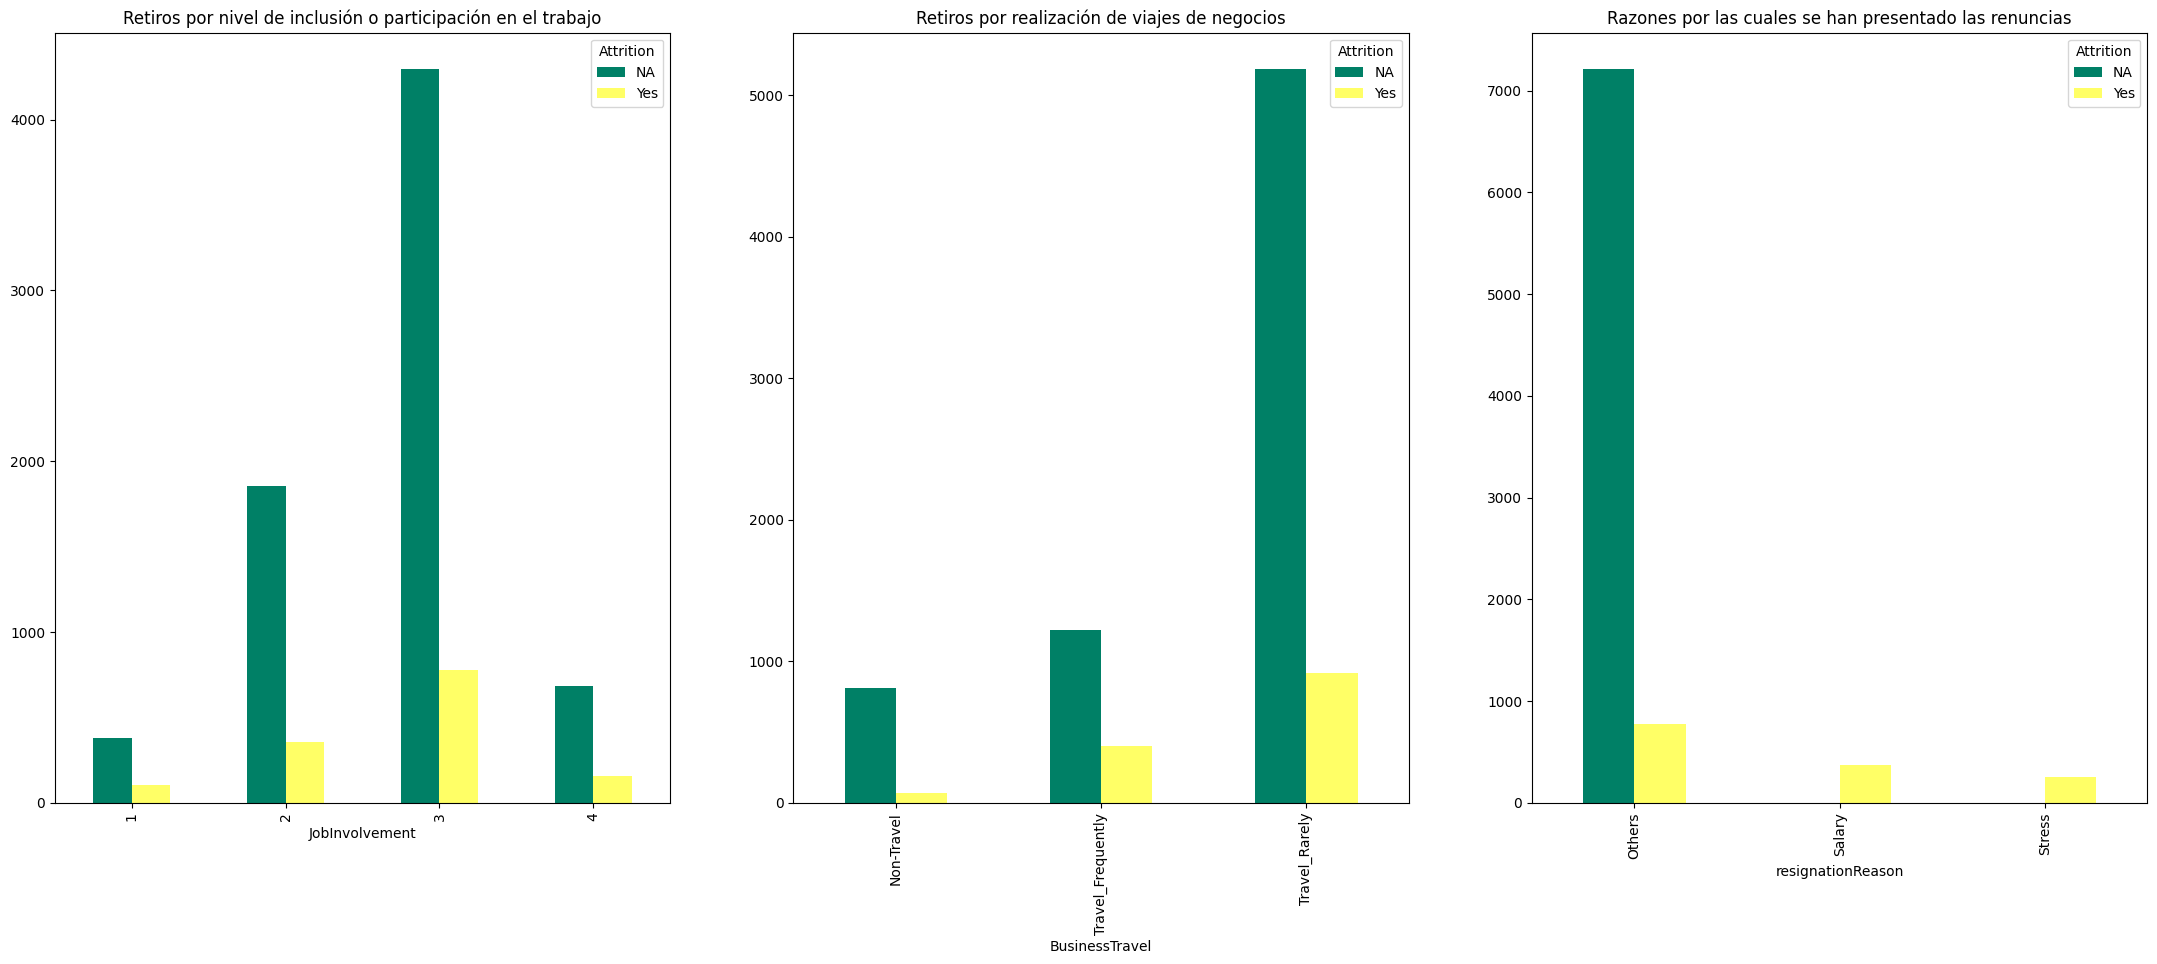

In [58]:
#Exploremos otras variables
#Crear figura
fig, axs = plt.subplots(1, 3, figsize=(27, 10))

# Gráfico Nivel de inclusión o participación en el trabajo
pd.crosstab(index=dfdata['JobInvolvement'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[0], colormap='summer')
axs[0].set_title('Retiros por nivel de inclusión o participación en el trabajo')

# Gráfico retiros por viajes
pd.crosstab(index=dfdata['BusinessTravel'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[1], colormap='summer')
axs[1].set_title('Retiros por realización de viajes de negocios')

# Gráfico Razones por las cuales se han presentado las renuncias
pd.crosstab(index=dfdata['resignationReason'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[2], colormap='summer')
axs[2].set_title('Razones por las cuales se han presentado las renuncias')

# Mostrar los gráficos
plt.show()

Los retiros por nivel de participación en el trabajo, son proporcionales a la cantidad de colaboradores, lo que podría no influir en la solucipon.
Los colaboradores que rara vez viajan, son los que han presentado mayor cantidad de retiros, sin embargo, está en proporción con respecto a los colaboradores que permanecen en la compañía.
En cuanto a las razones de retiro por renuncia, se tiene gran cantidad clasificada como otras razones, seguida por motivo de salario y finalizando con niveles de estrés.

In [59]:
#Se considera entonces la variable de salario
#Promedio de salario mensual de empleados que renuncian
dfdata.groupby(["Attrition"])[["MonthlyIncome"]].mean().round(2).reset_index().rename(columns={'MonthlyIncome':'Salario Promedio'})

,Attrition,Salario Promedio
0,NA,65733.76
1,Yes,61564.22


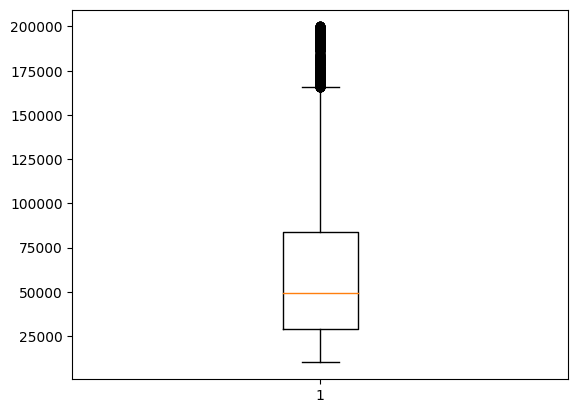

In [60]:
#Evaluamos la media del salario
plt.boxplot(dfdata['MonthlyIncome'])
plt.show()

Los valores se encuetran sesgados hacia la izquierda, la distribución del salario tiene como media 50,000.

El salario promedio de las personas que renuncian está por encima de la media de salarios, sin embargo, es menor que las que no renuncian por casi 4000 unidades de diferencia.

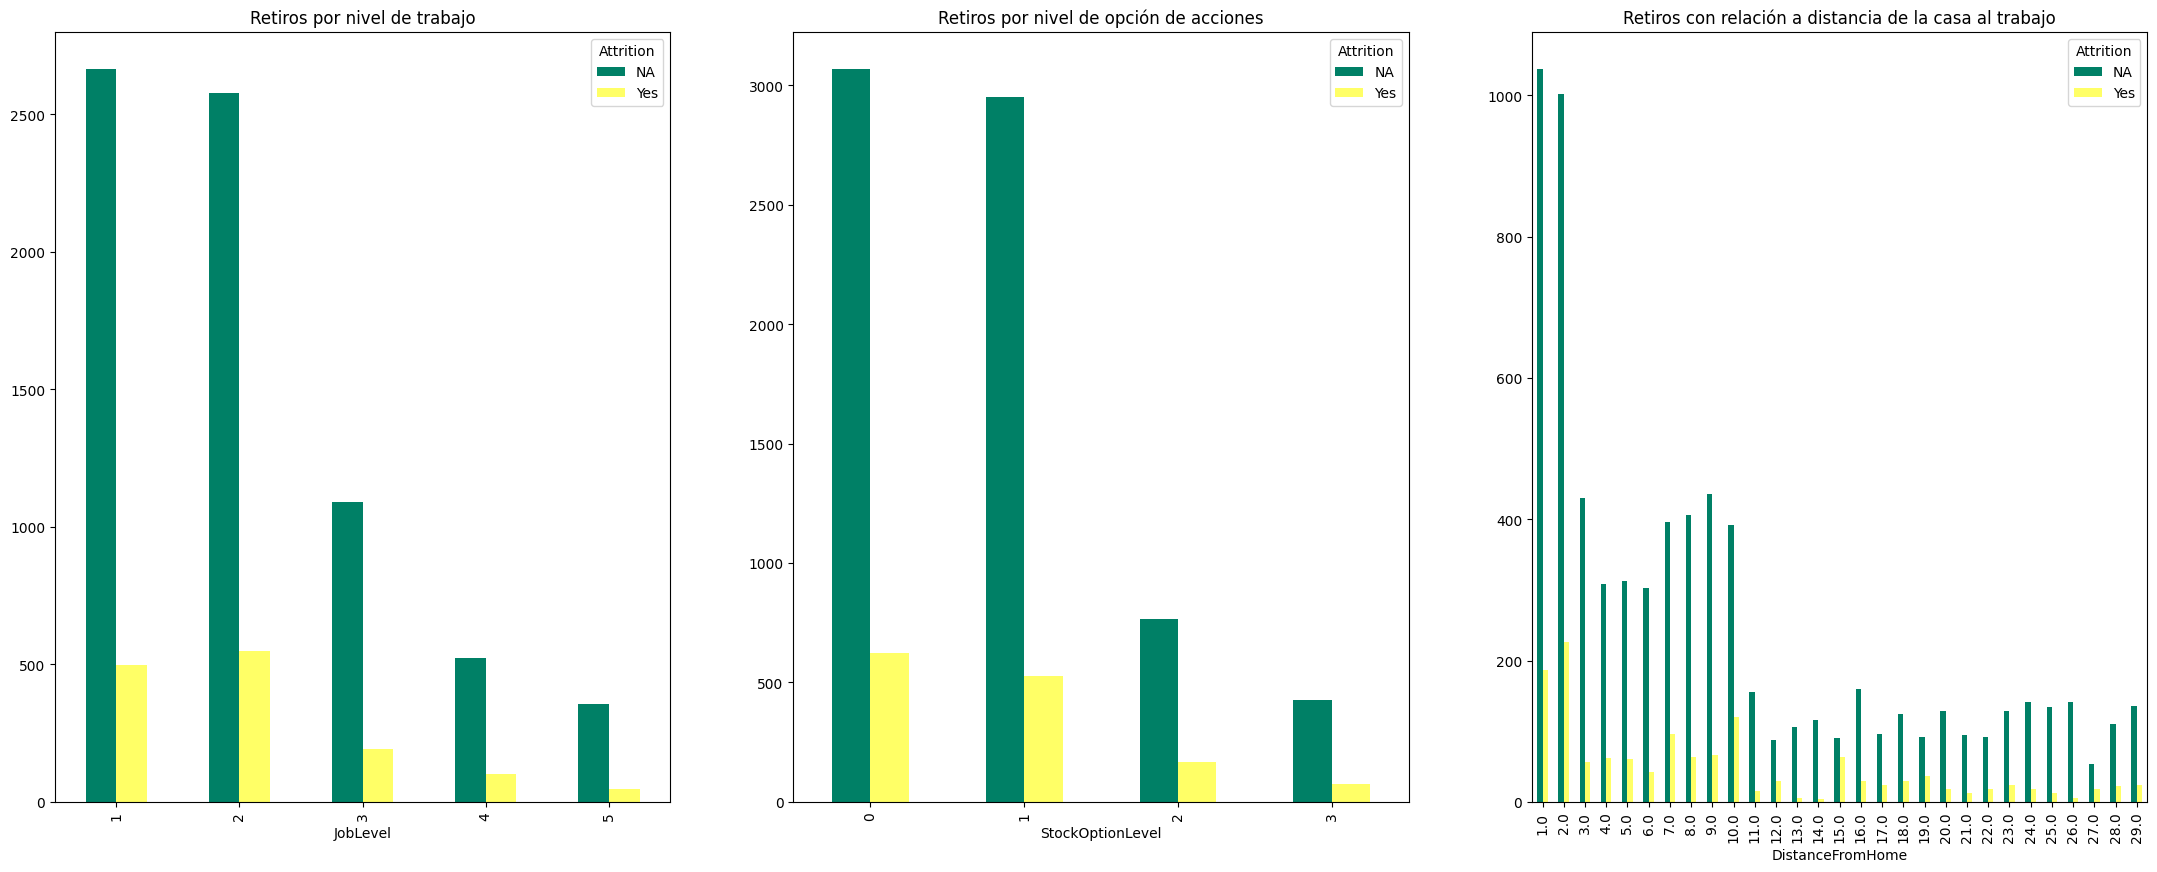

In [61]:
#Para considerar los niveles de estrés, evaluamos las variables de nivel de trabajo, nivel de opción de acciones y distancia de la casa al trabajo.
#Crear figura
fig, axs = plt.subplots(1, 3, figsize=(27, 10))

# Gráfico Nivel de trabajo
pd.crosstab(index=dfdata['JobLevel'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[0], colormap='summer')
axs[0].set_title('Retiros por nivel de trabajo')

# Gráfico nivel de opción de acciones
pd.crosstab(index=dfdata['StockOptionLevel'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[1], colormap='summer')
axs[1].set_title('Retiros por nivel de opción de acciones')

# Gráfico distancia de la casa al trabajo
pd.crosstab(index=dfdata['DistanceFromHome'], columns=dfdata['Attrition']).plot(kind='bar', ax=axs[2], colormap='summer')
axs[2].set_title('Retiros con relación a distancia de la casa al trabajo')

# Mostrar los gráficos
plt.show()

En cuanto al nivel de trabajo, se tienen mayores renuncias en los niveles más bajos y de manera notoria en el nivel 2.
Para el nivel de acción, se presenta mayor cantidad de renuncias en los más bajos niveles, aunque se ve de manera proporcional a la cantidad de colaboradores por categoría.
Finalmente, para la distancia entre la casa y el trabajo, parece una distribución proporcional a la cantidad de colaboradores por categoría, dándose mayor cantidad de renuncias en las distancias más cortas.

In [62]:
# Guardar el DataFrame en un archivo CSV
dfdata.to_csv('df_limpio.csv', index=False)

In [63]:
# Agrupar los datos por EmployeeID y comparar las columnas para los años 2015 y 2016
resultados = []

for employee_id, group in dfdata.groupby('EmployeeID'):
    if len(group) == 2:  # Solo considerar aquellos EmployeeID que tengan resultados para ambos años
        info_2015 = group[group['InfoDate'] == 2015]
        info_2016 = group[group['InfoDate'] == 2016]

        # Verificar si hay datos para ambos años
        if not info_2015.empty and not info_2016.empty:
            info_2015 = info_2015.iloc[0]
            info_2016 = info_2016.iloc[0]

            # Comparar las columnas específicas
            if not info_2015[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']].equals(info_2016[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']]):
                resultados.append(employee_id)
        else:
            print(f"No hay datos para ambos años para el EmployeeID: {employee_id}")

# Imprimir los resultados
if len(resultados) > 0:
    print("Los siguientes EmployeeID tienen resultados diferentes para 2015 y 2016:")
    for employee_id in resultados:
        print(employee_id)
else:
    print("No hay diferencias encontradas para ningún EmployeeID.")


No hay datos para ambos años para el EmployeeID: 1
No hay datos para ambos años para el EmployeeID: 2
No hay datos para ambos años para el EmployeeID: 3
No hay datos para ambos años para el EmployeeID: 4
No hay datos para ambos años para el EmployeeID: 5
No hay datos para ambos años para el EmployeeID: 6
No hay datos para ambos años para el EmployeeID: 7
No hay datos para ambos años para el EmployeeID: 8
No hay datos para ambos años para el EmployeeID: 9
No hay datos para ambos años para el EmployeeID: 10
No hay datos para ambos años para el EmployeeID: 11
No hay datos para ambos años para el EmployeeID: 13
No hay datos para ambos años para el EmployeeID: 14
No hay datos para ambos años para el EmployeeID: 15
No hay datos para ambos años para el EmployeeID: 16
No hay datos para ambos años para el EmployeeID: 17
No hay datos para ambos años para el EmployeeID: 18
No hay datos para ambos años para el EmployeeID: 19
No hay datos para ambos años para el EmployeeID: 20
No hay datos para amb

Como ya se verifico que no hay diferencia para los datos de 2015 y 2016, puestos que tienen los mismos resultados para cada EmployeeID se procede a trabajar solo con la base de datos del 2016.


In [64]:
dfdata.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,JobSatisfaction,WorkLifeBalance,DateSurvey,JobInvolvement,PerformanceRating,SurveyDate,Attrition,retirementDate,retirementType,resignationReason
0,51.0,Travel_Rarely,Sales,6.0,2,Life Sciences,1,1,Female,1,...,4.0,2.0,2015-12-31,3,3,2015-12-31,NA,NA,NA,Others
1,31.0,Travel_Frequently,Research & Development,10.0,1,Life Sciences,1,2,Female,1,...,2.0,4.0,2015-12-31,2,4,2015-12-31,Yes,2016-10-15,Resignation,Others
2,32.0,Travel_Frequently,Research & Development,17.0,4,Other,1,3,Male,4,...,2.0,1.0,2015-12-31,3,3,2015-12-31,NA,NA,NA,Others
3,38.0,Non-Travel,Research & Development,2.0,5,Life Sciences,1,4,Male,3,...,4.0,3.0,2015-12-31,2,3,2015-12-31,NA,NA,NA,Others
4,32.0,Travel_Rarely,Research & Development,10.0,1,Medical,1,5,Male,1,...,1.0,3.0,2015-12-31,3,3,2015-12-31,NA,NA,NA,Others


In [65]:
# Ahora creamos un nuevo dataframe con solo los resultados del 2016.
dfdata['InfoDate'] = pd.to_datetime(dfdata['InfoDate'])
dfdataN = dfdata[dfdata['InfoDate'].dt.year == 2016].copy()
dfdataN.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,JobSatisfaction,WorkLifeBalance,DateSurvey,JobInvolvement,PerformanceRating,SurveyDate,Attrition,retirementDate,retirementType,resignationReason
4410,51.0,Travel_Rarely,Sales,6.0,2,Life Sciences,1,1,Female,1,...,4.0,2.0,2016-12-31,3,3,2016-12-31,NA,NA,NA,Others
4411,31.0,Travel_Frequently,Research & Development,10.0,1,Life Sciences,1,2,Female,1,...,2.0,4.0,2016-12-31,2,4,2016-12-31,Yes,2016-10-15,Resignation,Others
4412,32.0,Travel_Frequently,Research & Development,17.0,4,Other,1,3,Male,4,...,2.0,1.0,2016-12-31,3,3,2016-12-31,NA,NA,NA,Others
4413,38.0,Non-Travel,Research & Development,2.0,5,Life Sciences,1,4,Male,3,...,4.0,3.0,2016-12-31,2,3,2016-12-31,NA,NA,NA,Others
4414,32.0,Travel_Rarely,Research & Development,10.0,1,Medical,1,5,Male,1,...,1.0,3.0,2016-12-31,3,3,2016-12-31,NA,NA,NA,Others


#Métricas

In [69]:
#se corrigen datos int64 que pasan a categoricas y se elimina Employee ID.
dfdataN=dfdataN.astype({"JobInvolvement":object,"EmployeeCount":object,"StandardHours":object,"PerformanceRating":object,"EnvironmentSatisfaction":object,"JobSatisfaction":object,"WorkLifeBalance":object,"TrainingTimesLastYear":object,"StockOptionLevel":object,"JobLevel":object,"Education":object })
X=dfdataN.drop(["EmployeeID"],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 4410 to 8818
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Age                      4300 non-null   float64       
 1   BusinessTravel           4300 non-null   object        
 2   Department               4300 non-null   object        
 3   DistanceFromHome         4300 non-null   float64       
 4   Education                4300 non-null   object        
 5   EducationField           4300 non-null   object        
 6   EmployeeCount            4300 non-null   object        
 7   Gender                   4300 non-null   object        
 8   JobLevel                 4300 non-null   object        
 9   JobRole                  4300 non-null   object        
 10  MaritalStatus            4300 non-null   object        
 11  MonthlyIncome            4300 non-null   float64       
 12  NumCompaniesWorked       4300 n

In [70]:
#Verificamos antes de exportar la tabla, que esté sin datos nulos
dfdata.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
InfoDate                   0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
DateSurvey                 0
JobInvolvement             0
PerformanceRating          0
SurveyDate                 0
Attrition                  0
retirementDate             0
retirementType             0
resignationRea

In [71]:
# Guardar el DataFrame en un archivo CSV
dfdataN.to_csv('dfdataN.csv', index=False)